In [1]:
from fitburst.pipelines.run_fitburst import run_fitburst
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 14})
%matplotlib inline

Using hard-coded default config. Run update_from_site_config() toget config from kotekan


## Run baseband pipeline and save npz file

In [2]:
from baseband_backend.baseband_make_npz import make_fitburst_input

While running the first get_snr it will use the DM range as 5
Running the first get_snr() at DM  None


/data/user-data/danielabreitman/Baseband/baseband-analysis/baseband_analysis/core/signal.py:112: RuntimeWarning: Mean of empty slice
  if not np.isnan(np.nanmean(power_in[-1], axis=0)).any():
[2022-08-09 11:07:50,546] INFO Applying LTE mask
/data/user-data/danielabreitman/Baseband/baseband-analysis/baseband_analysis/core/flagging.py:93: RuntimeWarning: Mean of empty slice
  spect = get_spect(np.nanmean(power_beam, axis=-1), thres=thres_mean)
/usr/local/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
[2022-08-09 11:08:19,732] INFO Best DM found at 164.33677301704392 pc/cc
[2022-08-09 11:08:20,879] INFO Applying LTE mask
[2022-08-09 11:08:30,752] INFO Applying LTE mask


From now on the DM_range for get_snr() will be None
DM after struc max 164.31834001061944


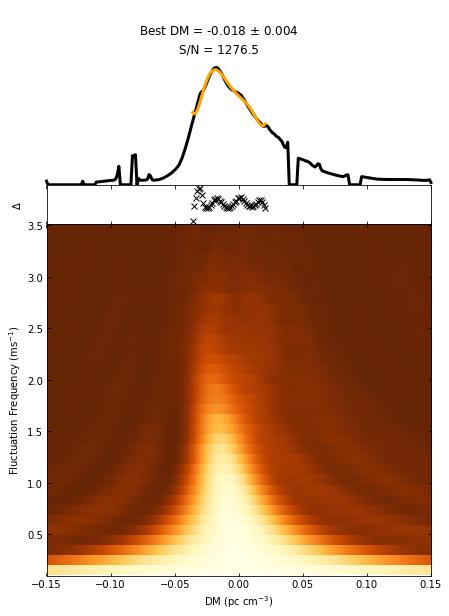

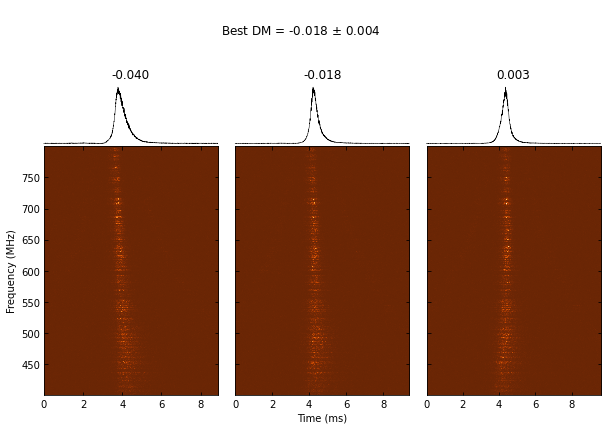

/data/user-data/danielabreitman/Baseband/baseband-analysis/baseband_analysis/core/signal.py:112: RuntimeWarning: Mean of empty slice
  if not np.isnan(np.nanmean(power_in[-1], axis=0)).any():
[2022-08-09 11:08:58,069] INFO Applying LTE mask
/data/user-data/danielabreitman/Baseband/baseband-analysis/baseband_analysis/core/flagging.py:93: RuntimeWarning: Mean of empty slice
  spect = get_spect(np.nanmean(power_beam, axis=-1), thres=thres_mean)
/usr/local/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
[2022-08-09 11:09:07,858] INFO Applying LTE mask


DM value used from now on is 164.29990700419495


<Figure size 432x288 with 0 Axes>

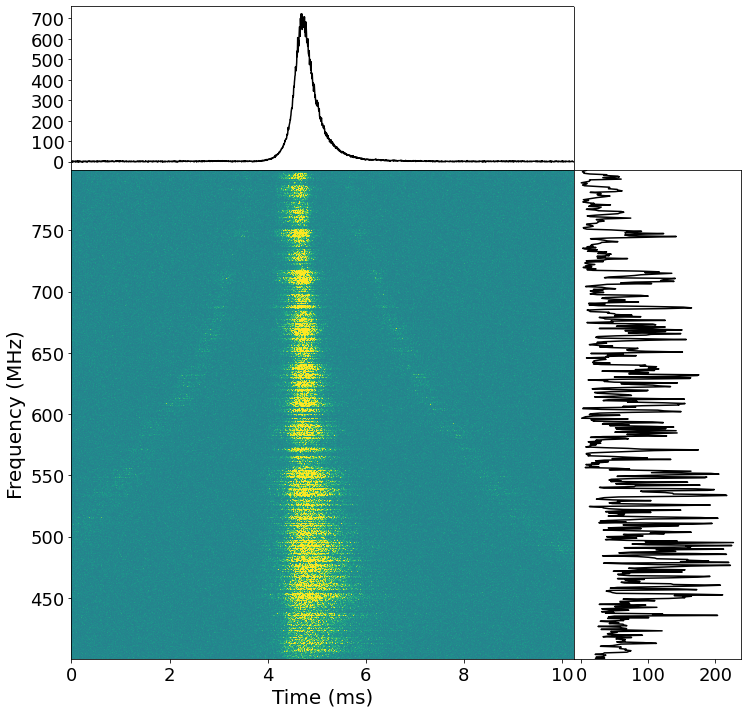

<Figure size 432x288 with 0 Axes>

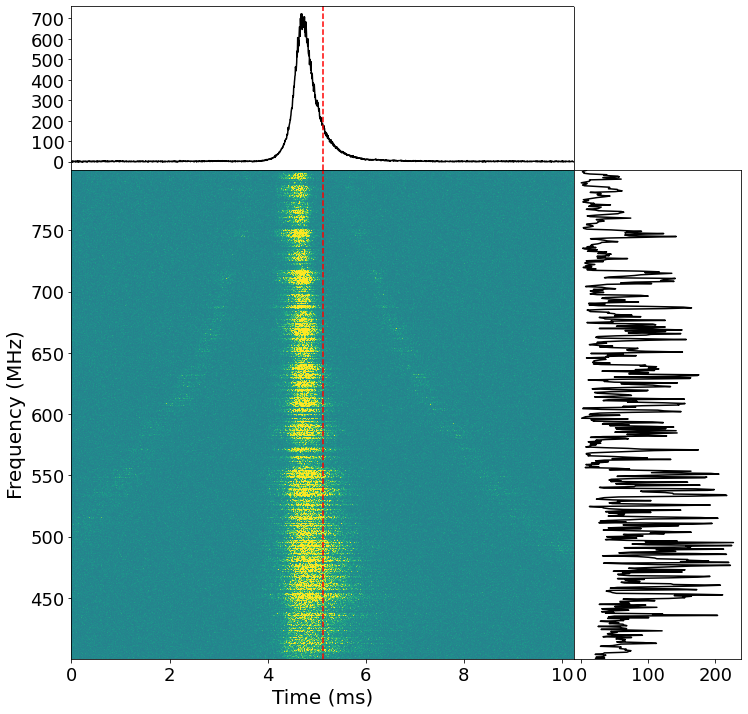

In [11]:
make_fitburst_input('/data/chime/baseband/processed/2021/11/05/astro_195718715/singlebeam_195718715.h5',
           downsample = 2,
           save = 'pm_', # Prefix for saving MCMC results
           diagnostic_plots = True,
           peaks = [1000],
           time_range = [22500//2, 26500//2],
           output = "test_new_pipeline_fitburst_195718715", #prefix for fitburst npz input file
          )

## Load saved npz file from baseband pipeline step above, run MCMC IC pipeline

In [7]:
from fitburst.pipelines.compute_mcmc_ics import make_input

Starting MCMC fit
3  {}
[0.00512]
[0.00256256]
[0.00256256]
[0, 0.0025625600000000006, 0, 0] [0.09531965140119672, 0.00512, 0.00016384, 0.00032768] [inf, 0.00512, inf, inf]


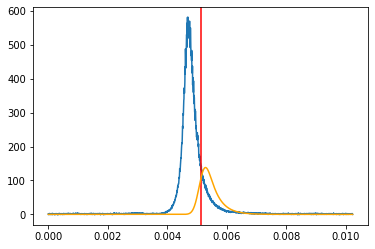

Curve_fit params: [2.88558637e-01 4.57999362e-03 1.35259950e-04 2.43156442e-04]
MEAN [0.00457999]
Reduced Chi Squared for Event 195718715 is 3.238


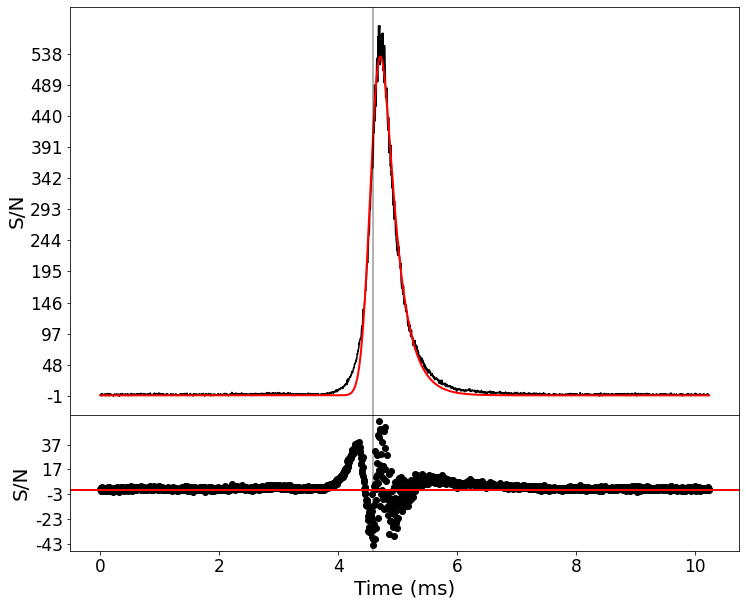

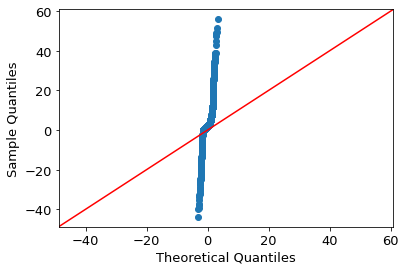

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:36<00:00, 135.40it/s]


[41.89890355 43.3955128  42.56022722 42.37130721]


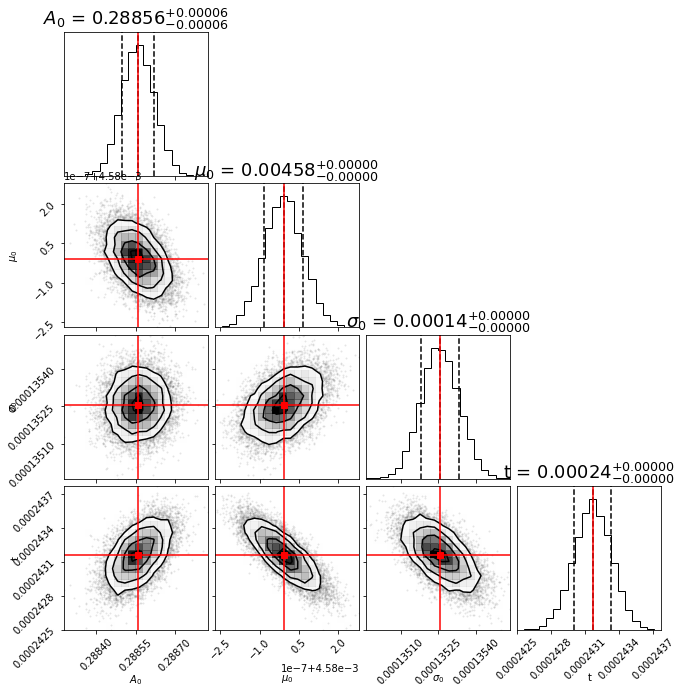

MEAN [0.00457999]
Reduced Chi Squared for Event 195718715 is 3.238


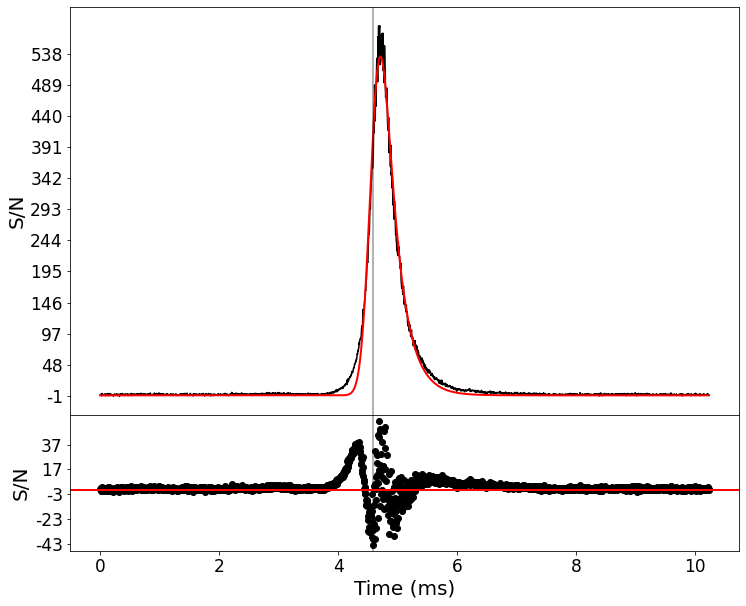

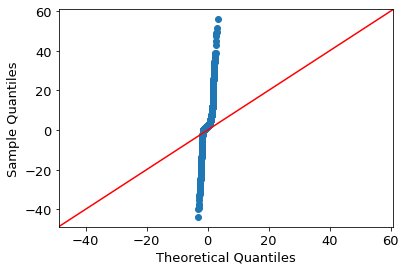

In [12]:
make_input('./test_new_pipeline_fitburst_195718715.npz', 
            nwalkers=50,
            nchain=5000,  
            diagnostic_plots=True,
            output = 'newtest') 

## Load MCMC IC and run fitburst

INFO: no solution file found or provided; proceeding with fit...
Before applying scintillation mask:


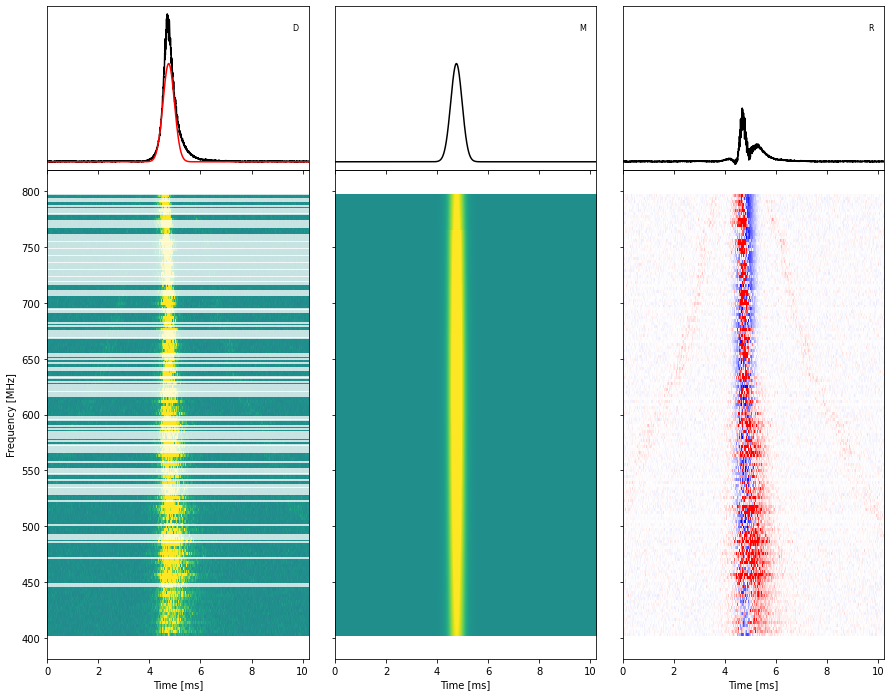

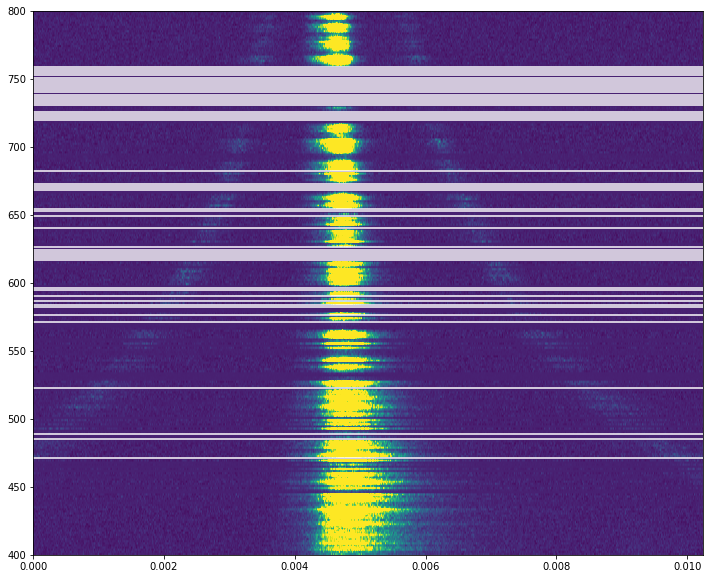

Removing channels with median below: max(0,  29.76891922062549 )
(256,) 204
(256,)
After scintillation mask:
Scintillation mask removed:  56  frequency channels
After applying scintillation mask:


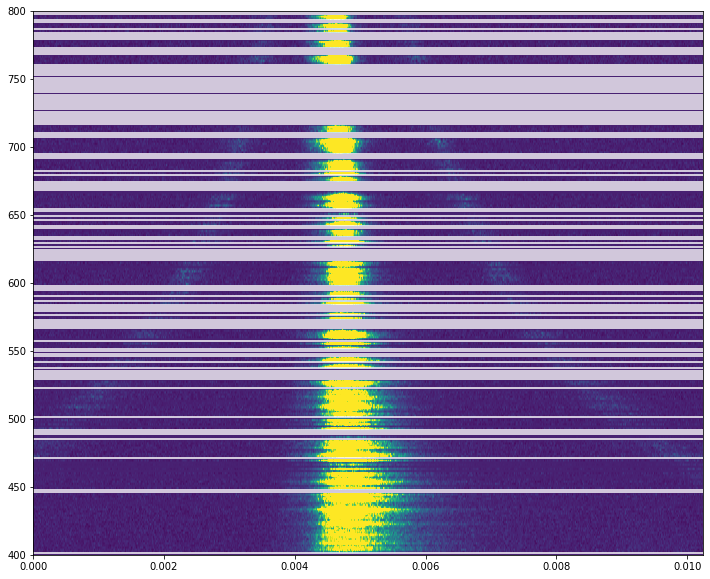

INFO: input data cube is already dedispersed!
INFO: setting 'dm' entry to 0, now considered a dm-offset parameter...
INFO: computing dedispersion-index matrix
INFO: initializing model
INFO: removing the following parameters: dm, dm_index, scattering_index
INFO: new list of fit parameters: amplitude, arrival_time, burst_width, scattering_timescale, spectral_index, spectral_running


In [ ]:
%run ./fitburst_example_generic.py  ./test_new_pipeline_fitburst_195718715.npz --show --outfile "195718715" --amplitude " -1.31" --fit "scattering_timescale" --scintillation 2.0 --downsample_freq 4 --fix "dm" 